# Scaling plots for `g40` for NCMAS2026
Re-plotting data from https://github.com/ACCESS-NRI/access-models-scaling

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO

## accessom3_global_25km

`table` data copied from 
https://github.com/ACCESS-NRI/access-models-scaling/blob/85268042a0d0e5c68b9a79cf62d5f481ba79771e/accessom3_global_25km.ipynb

In [44]:
table = """
	[MED] RunPhase1	[ICE] RunPhase1	[data component (ATM+ROF)] RunPhase1	[MED+ICE+ATM+ROF] RunPhase1	[OCN] RunPhase1
__output_name	combine	combine	combine	combine	combine
cores					
13.0	0.764188	1.986143	0.033305	2.783636	NaN
39.0	0.192283	0.657089	0.011427	0.860798	NaN
52.0	NaN	NaN	NaN	NaN	9.114221
65.0	0.107461	0.367801	0.006799	0.482062	NaN
104.0	0.062242	0.245485	0.004488	0.312215	NaN
130.0	0.055028	0.236045	0.003545	0.294617	NaN
156.0	0.049478	0.203518	0.002983	0.255980	NaN
195.0	0.039430	0.170609	0.002401	0.212439	NaN
221.0	0.040086	0.151287	0.002236	0.193609	NaN
260.0	0.034938	0.133327	0.001944	0.170209	NaN
299.0	0.031977	0.117733	0.001775	0.151485	NaN
390.0	0.032878	0.086958	0.001552	0.121388	NaN
416.0	0.028607	0.138979	0.001606	0.169192	0.941314
442.0	0.026953	0.090862	0.001512	0.119328	NaN
468.0	0.025080	0.094771	0.001304	0.121155	NaN
494.0	0.025593	0.087526	0.001260	0.114380	NaN
624.0	NaN	NaN	NaN	NaN	0.677580
832.0	NaN	NaN	NaN	NaN	0.546290
884.0	NaN	NaN	NaN	NaN	0.475351
1040.0	NaN	NaN	NaN	NaN	0.399423
1248.0	NaN	NaN	NaN	NaN	0.347034
1456.0	NaN	NaN	NaN	NaN	0.300622
1664.0	NaN	NaN	NaN	NaN	0.269613
1872.0	NaN	NaN	NaN	NaN	0.246700
2080.0	NaN	NaN	NaN	NaN	0.239158
2288.0	NaN	NaN	NaN	NaN	0.214255
2392.0	NaN	NaN	NaN	NaN	0.203936
2496.0	NaN	NaN	NaN	NaN	0.215212
2600.0	NaN	NaN	NaN	NaN	0.214167
"""

In [130]:
names=['Cores', 'Coupler', 'CICE6', 'Forcing', 'Coupler+CICE6+ATM+ROF', 'MOM6']

data = pd.read_csv(StringIO(table),
            sep='\t',
            skiprows=[0, 1, 2, 3],
            names=names)

In [131]:
data

,Cores,Coupler,CICE6,Forcing,Coupler+CICE6+ATM+ROF,MOM6
0,13.0,0.764188,1.986143,0.033305,2.783636,NaN
1,39.0,0.192283,0.657089,0.011427,0.860798,NaN
2,52.0,NaN,NaN,NaN,NaN,9.114221
3,65.0,0.107461,0.367801,0.006799,0.482062,NaN
4,104.0,0.062242,0.245485,0.004488,0.312215,NaN
5,130.0,0.055028,0.236045,0.003545,0.294617,NaN
6,156.0,0.049478,0.203518,0.002983,0.255980,NaN
7,195.0,0.039430,0.170609,0.002401,0.212439,NaN
8,221.0,0.040086,0.151287,0.002236,0.193609,NaN
9,260.0,0.034938,0.133327,0.001944,0.170209,NaN


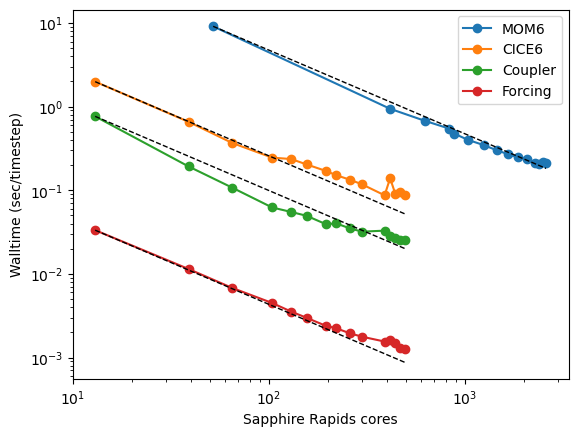

In [132]:
plt.figure()
for n in [names[i] for i in [0, 5, 2, 1, 3]][1:]:
    d = data.loc[:, [names[0], n]].dropna()
    p = plt.loglog(d.set_index(names[0]),
             marker='o', label=n)
    plt.loglog([d.iloc[0,0], d.iloc[-1,0]],
               [d.iloc[0,1], d.iloc[0,1]*d.iloc[0,0]/d.iloc[-1,0]],
               color='k',#p[-1].get_color(),
               linestyle='--',
               linewidth=1)
plt.xlabel('Sapphire Rapids cores')
plt.ylabel('Walltime (sec/timestep)')
plt.legend()